# 1.
Проблема: в выборке есть АЗС, на которых длительность большинства заездов короче 60 секунд.
Что нужно сделать: исключить эти АЗС из анализа. Так будет меньше шансов получить необъективные результаты, поскольку коротких заездов в целом больше всего.
Правило: исключаются из анализа те АЗС, на которых длительность половины или более заездов короче 60 секунд. Если бы вы писали отчёт, это предложение непременно вошло бы в него.
Примените правило на практике. Сначала из таблицы too_fast_stat получите id станций, которые не нарушают правило. Затем используйте эти id, чтобы отфильтровать таблицу data.
Выполните следующие шаги:
Создайте переменную good_ids и поместите в неё те строки из too_fast_stat, где too_fast меньше 50%. Не забывайте, что в таблице data too_fast является булевым значением и атрибутом заезда, но в таблице too_fast_stat too_fast — это процент заездов, длительность которых короче 60 секунд, и атрибут заправочной станции.
Создайте переменную good_data и поместите в неё те строки из data, где в good_ids.index находится id. Другими словами, соберите все заезды, не нарушающие правило.
Распечатайте число строк в data, а затем и число строк в good_data.

Подсказка
Примените query() к too_fast_stat с условием 'too_fast < 0.5'.
Примените query() к data, используйте оператор in. Обращайтесь к значениям индексов с помощью @.
Найдите число строк в таблицах data и good_data функцией len().

In [4]:
import pandas as pd

data = pd.read_csv('../datasets/visits.csv', sep='\t')

# фильтруем слишком быстрые и медленные заезды и АЗС
data['too_fast'] = data['time_spent'] < 60
data['too_slow'] = data['time_spent'] > 1000
too_fast_stat = data.pivot_table(index='id', values='too_fast')

good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = data.query('id in @good_ids.index')
print(len(data))
print(len(good_data))

317104
229095


# 2.
Проблема: в выборке есть аномально быстрые и аномально медленные заезды. Скорее всего, их совершали не те, кто приезжал просто заправиться.
Что нужно сделать: исключить эти заезды из анализа, чтобы получить более точные показатели. Аномальные значения могут влиять на средние значения и медианы.
Правило: заезды, длительность которых короче 60 секунд и длиннее 1000 секунд, исключаются из анализа — это предложение тоже вошло бы в отчёт.
Примените новое правило и получите выборку без аномальных заездов.
Выполните следующие шаги:
С помощью функции query() обновите таблицу good_data, выбрав строки, где time_spent в диапазоне между 60 и 1000 секунд. Убедитесь, что заезды длительностью по 60 и 1000 секунд тоже включены.
Выведите на экран число строк в обновлённой good_data.

Подсказка
Пропишите в условии, что значение столбца time_spent в таблице good_data одновременно больше либо равно 60 и меньше либо равно 1000. Передайте получившееся условие в query(). Результат присвойте good_data.

In [5]:
good_data = good_data.query('time_spent >= 60 and time_spent <= 1000')
print(len(good_data))

# 3.
В предыдущих задачах вы выбросили из набора данных отдельные заезды и даже целые АЗС ради более реалистичной оценки. Проверьте, помогло ли это. Постройте гистограмму распределения медианной длительности заправки по всем АЗС.
Выполните следующие шаги:
Создайте переменную good_stations_stat и поместите в неё данные из таблицы с медианными значениями time_spent по каждой АЗС. Не забудьте рассчитать медианы по good_data.
Постройте гистограмму на 50 корзин по этим медианным значениям.

Подсказка
Выведите на экран таблицу good_data, чтобы были указаны точные названия столбцов. Используйте сводную таблицу, чтобы создать переменную good_stations_stat. Постройте гистограмму методом hist() с параметром bins=50.

array([[<AxesSubplot:title={'center':'time_spent'}>]], dtype=object)

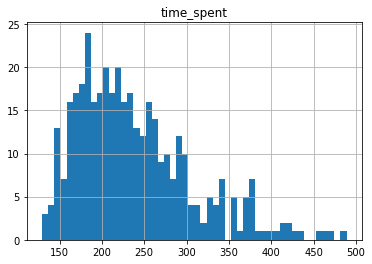

In [8]:
good_stations_stat = good_data.pivot_table(index='id', values='time_spent', aggfunc='median')
good_stations_stat.hist(bins=50)

# 4.
Как вы помните, цель вашего анализа — определить сети заправок, где водители задерживаются надолго. Рассчитайте медианную продолжительность заезда для каждой сети и выведите на экран список в порядке возрастания.
Выполните следующие шаги:
Создайте переменную good_stat и поместите в неё данные из таблицы с медианными значениями time_spent по каждой сети. Не забудьте рассчитать медианы по good_data.
Выведите на экран таблицу good_stat, отсортировав её по возрастанию медианного времени.

Подсказка
С помощью сводной таблицы создайте переменную good_stat. Отсортируйте good_stat по возрастанию медианной длительности заезда, используя sort_values('time_spent').

In [9]:
good_stat = good_data.pivot_table(index='name', values='time_spent', aggfunc='median').sort_values('time_spent', ascending=True)
print(good_stat)

          time_spent
id                  
91d88d59       129.5
030a9067       135.5
0410bffa       136.0
a8256186       137.0
5ba7a32b       138.0
...              ...
f9218ed9       438.0
fbbd8cc2       454.5
e648b45e       465.5
463247c8       468.5
e6ee10ab       489.0

[386 rows x 1 columns]
